                                                Universidad Nacional Abierta y a Distancia
                                                Vicerrectoría Académica y de Investigación
                                                        Curso: Análisis de datos
                                                             Código: 202016908 

                                                    Tarea 5: Proyecto Análisis de Datos

                                                               Estudiante:
                                                          Bernardo Mejía Jiménez

                                                            Grupo: 202337121_8
	
                                                               Presentado a:
                                                         Ing. Ferley Medina Rojas



### Libreria


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
# Cargar el dataset
file_path = './Titanic-Dataset.csv'
titanic_df = pd.read_csv(file_path)

### paso 1: Análisis exploratorio de los datos

In [4]:
# Mostrar información general del dataset
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   ID/pasajero                                      891 non-null    int64  
 1   Sobreviviente                                    891 non-null    int64  
 2   Clase/billete                                    891 non-null    int64  
 3   Nombre/Pasajero                                  891 non-null    object 
 4   Sexo                                             891 non-null    object 
 5   Edad                                             714 non-null    float64
 6   Número de hermanos/cónyuges a bordo del Titanic  891 non-null    int64  
 7   Número de padres/hijos a bordo del Titanic       891 non-null    int64  
 8   Ticket                                           891 non-null    object 
 9   Tarifa/pasajero                 

In [5]:
# Describir el dataset
print(titanic_df.describe())

       ID/pasajero  Sobreviviente  Clase/billete        Edad  \
count   891.000000     891.000000     891.000000  714.000000   
mean    446.000000       0.383838       2.308642   29.699118   
std     257.353842       0.486592       0.836071   14.526497   
min       1.000000       0.000000       1.000000    0.420000   
25%     223.500000       0.000000       2.000000   20.125000   
50%     446.000000       0.000000       3.000000   28.000000   
75%     668.500000       1.000000       3.000000   38.000000   
max     891.000000       1.000000       3.000000   80.000000   

       Número de hermanos/cónyuges a bordo del Titanic  \
count                                       891.000000   
mean                                          0.523008   
std                                           1.102743   
min                                           0.000000   
25%                                           0.000000   
50%                                           0.000000   
75%              

In [7]:
# Mostrar distribución de las variables categóricas
for column in ['Sexo', 'Embarcado', 'Clase/billete']:
    print(titanic_df[column].value_counts())

Sexo
male      577
female    314
Name: count, dtype: int64
Embarcado
S    644
C    168
Q     77
Name: count, dtype: int64
Clase/billete
3    491
1    216
2    184
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

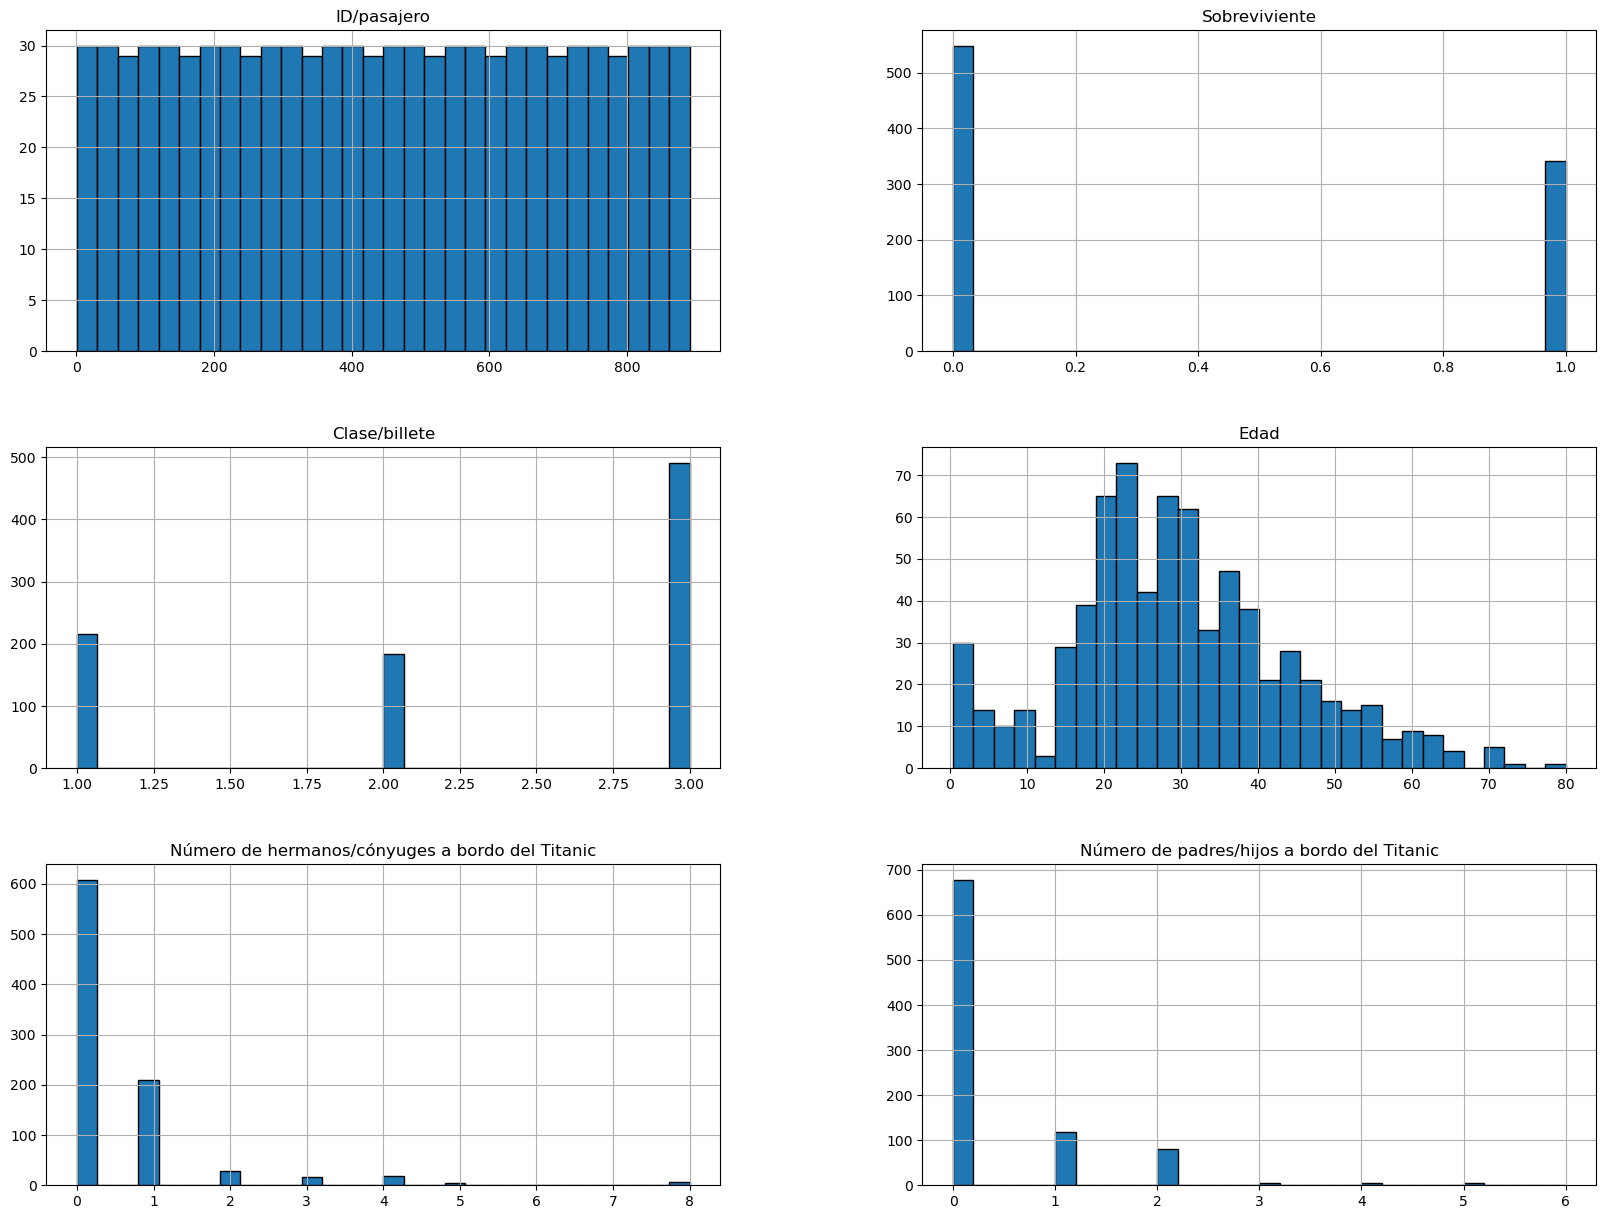

In [8]:
# Graficar las distribuciones de las variables numéricas
plt.figure(figsize=(15, 10))
titanic_df.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.show()

### paso 2: Preprocesamiento de los datos

In [9]:
# Convertir 'Tarifa/pasajero' a numérico, manejando posibles errores
titanic_df['Tarifa/pasajero'] = pd.to_numeric(titanic_df['Tarifa/pasajero'], errors='coerce')

In [10]:
# Imputar valores faltantes en 'Edad' y 'Tarifa/pasajero' con la media
imputer = SimpleImputer(strategy='mean')
titanic_df[['Edad', 'Tarifa/pasajero']] = imputer.fit_transform(titanic_df[['Edad', 'Tarifa/pasajero']])

In [12]:
# Imputar valores faltantes en 'Embarcado' con la moda
imputer = SimpleImputer(strategy='most_frequent')
titanic_df['Embarcado'] = imputer.fit_transform(titanic_df[['Embarcado']]).ravel()

In [13]:
# Convertir variables categóricas a numéricas
label_encoder = LabelEncoder()
titanic_df['Sexo'] = label_encoder.fit_transform(titanic_df['Sexo'])
titanic_df['Embarcado'] = label_encoder.fit_transform(titanic_df['Embarcado'])


In [14]:
# Selección de características relevantes
features = ['Clase/billete', 'Sexo', 'Edad', 'Número de hermanos/cónyuges a bordo del Titanic', 'Número de padres/hijos a bordo del Titanic', 'Tarifa/pasajero', 'Embarcado']
X = titanic_df[features]
y = titanic_df['Sobreviviente']

### paso 4: Dividir el dataset en Train y Test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### paso 5: Entrenar el modelo de Árbol de decisión

In [17]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### paso 6: Evaluar el desempeño del modelo

In [18]:
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

In [19]:
# Mostrar los resultados
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", cm)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
 [[90 15]
 [16 58]]


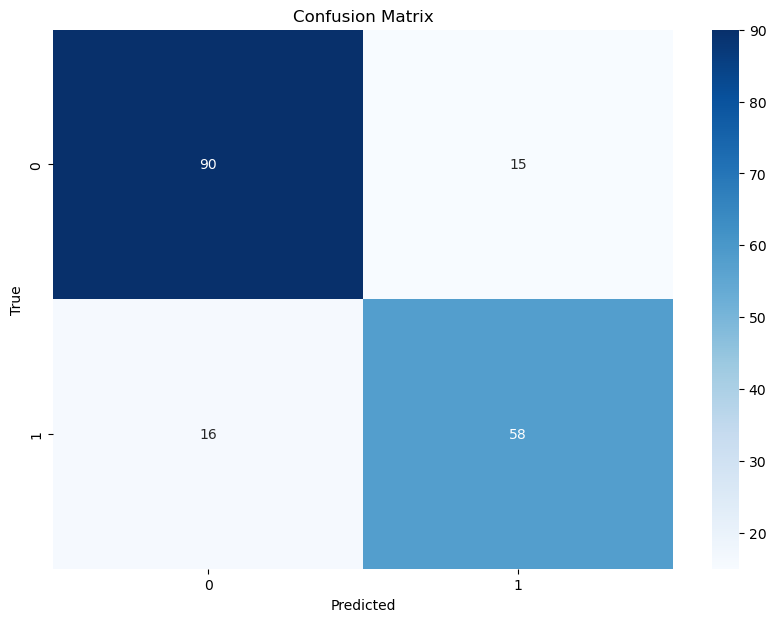

In [20]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### paso 7: Graficar la importancia de las características

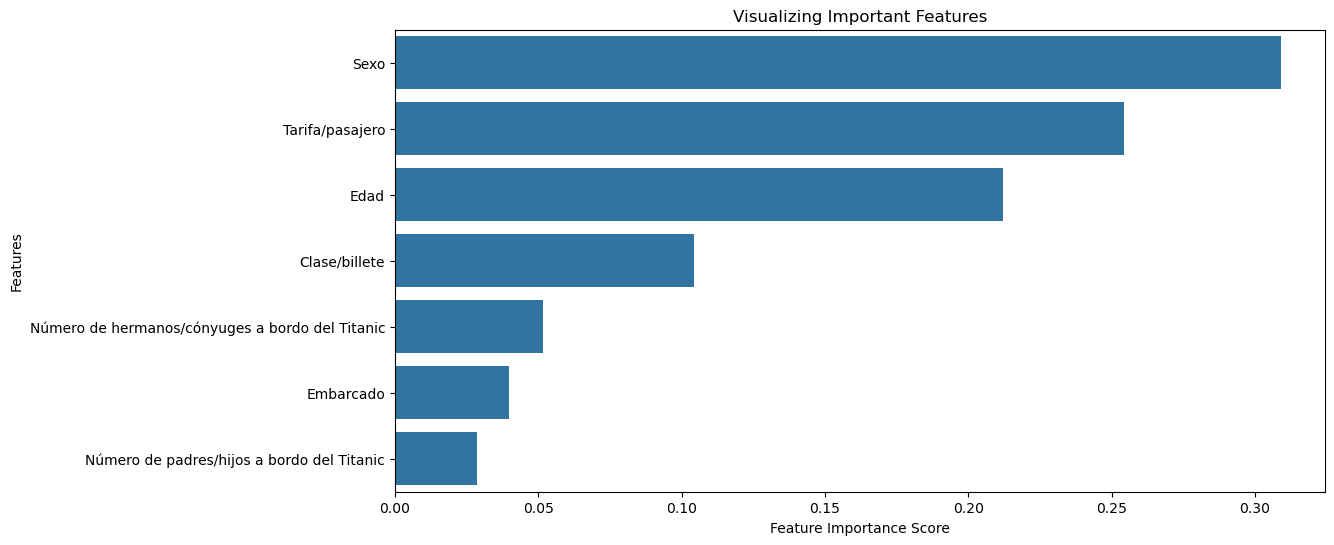

In [21]:
plt.figure(figsize=(12, 6))
feature_importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

### paso 8: Interpretar, analizar y documentar los resultados obtenidos

In [22]:
# Mostramos las métricas y discutimos los resultados

report_text = classification_report(y_test, y_pred)
print("Classification Report:\n", report_text)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



##1. Información General del Dataset
El dataset del Titanic contiene 891 registros y 12 columnas, que incluyen variables categóricas y numéricas. Algunas de estas columnas tienen valores faltantes que fueron tratados durante el preprocesamiento.
2. Descripción Estadística
A continuación se muestran las estadísticas descriptivas de las variables numéricas:

Edad:

•	Media: 29.70 años
•	Desviación estándar: 14.52 años
•	Mínimo: 0.42 años
•	Máximo: 80.00 años

Tarifa/pasajero:

•	Media: 32.20
•	Desviación estándar: 49.69
•	Mínimo: 0.00
•	Máximo: 512.33

3. Distribución de Variables Categóricas

Sexo:

•	Hombres: 577
•	Mujeres: 314

Embarcado:

•	S: 644
•	C: 168
•	Q: 77

Clase/billete:

•	Tercera clase: 491
•	Primera clase: 216
•	Segunda clase: 184

4. Evaluación del Modelo
   
•	Reporte de Clasificación:

 <img src = 'ima1.png'>
 
•	Matriz de Confusión:

<img src = 'ima2.png'>

 La matriz de confusión muestra que de los 105 casos de no supervivencia, el modelo predijo correctamente 90 y se equivocó en 15. Para los 74 casos de supervivencia, el modelo acertó en 58 y falló en 16.
•	Importancia de las Características:
 
5. Interpretación de Resultados
Precisión General:

•	El modelo tiene una precisión del 83%, lo cual es bastante bueno para un modelo de Árbol de Decisión.
•	La precisión es ligeramente mayor para la clase de "No sobrevivió" en comparación con la clase de "Sobrevivió".

Importancia de las Características:


<img src = 'ima3.png'>


•	Las características más importantes para predecir la supervivencia son el "Sexo", la "Tarifa/pasajero", y la "Edad".
•	El hecho de que el "Sexo" sea la característica más importante refleja la realidad histórica de que las mujeres tenían una mayor probabilidad de sobrevivir debido a las políticas de evacuación de "mujeres y niños primero".
•	La "Tarifa/pasajero" y la "Clase/billete" también son indicadores importantes, lo que sugiere que los pasajeros de clases más altas tenían mayores probabilidades de sobrevivir.
•	La "Edad" es otra característica significativa, indicando que los niños también tenían más probabilidades de ser rescatados.
Matriz de Confusión:

•	La matriz de confusión indica que el modelo tiene una buena capacidad para distinguir entre los pasajeros que sobrevivieron y los que no.
•	Sin embargo, hay un número significativo de falsos negativos (16), lo que significa que algunos pasajeros que realmente sobrevivieron fueron clasificados incorrectamente como no sobrevivientes.

